<a href="https://colab.research.google.com/github/NamrathaKaranth/30-Days-of-Deep-Learning/blob/main/Colorisephoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

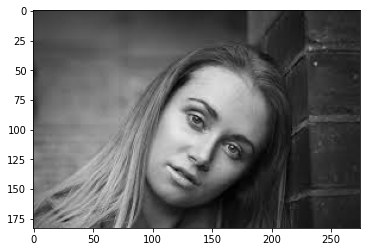

In [ ]:
pathimg = '/content/example.jpg'
img= cv2.imread(pathimg)
plt.imshow(img)

In [ ]:
!git clone https://github.com/BVLC/caffe.git

fatal: destination path 'caffe' already exists and is not an empty directory.


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import os
print("Required modules imported.")

Required modules imported.


In [ ]:
CAFFE_ROOT = os.path.expanduser('/content/caffe')

if not os.path.exists(CAFFE_ROOT):
    print("Houston, you may have a problem.") 
    print("Did you change CAFFE_ROOT to point to your local Caffe repo?")
    print("Try running: git clone https://github.com/BVLC/caffe.git")

In [ ]:
MODEL = 'bvlc_reference_rcnn_ilsvrc13', 'bvlc_reference_rcnn_ilsvrc13.caffemodel'

In [ ]:
CAFFE_MODELS = os.path.join(CAFFE_ROOT, 'models')

In [ ]:
CAFFE_MODEL_FILE = os.path.join(CAFFE_MODELS, MODEL[0], 'deploy.prototxt')

In [ ]:
CAFFE_PRETRAINED = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[1])

In [ ]:
if not os.path.exists(CAFFE_PRETRAINED):
    print(CAFFE_PRETRAINED + " not found. Attempting download. Be patient...\n")
    os.system(
        os.path.join(CAFFE_ROOT, 'scripts/download_model_binary.py') +
        ' ' +
        os.path.join(CAFFE_ROOT, 'models', MODEL[0]))
else:
    print("You already have " + CAFFE_PRETRAINED + ", skipping download...\n")

/content/caffe/models/bvlc_reference_rcnn_ilsvrc13/bvlc_reference_rcnn_ilsvrc13.caffemodel not found. Attempting download. Be patient...



In [ ]:
if not os.path.exists(CAFFE_MODEL_FILE):
    print("Caffe model file, " + CAFFE_MODEL_FILE + " was not found!")
else:
    print("Both the deploy.prototxt and .caffemodel files were found, ready to continue!")

Both the deploy.prototxt and .caffemodel files were found, ready to continue!


In [ ]:
import cv2 # opencv 3.4.2+ required
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
proto = '/content/colorization_deploy_v2.prototxt'
weights = '/content/colorization_release_v2.caffemodel'
pts_in_hull = np.load('/content/pts_in_hull.npy')
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1).astype(np.float32)

In [ ]:
net = cv2.dnn.readNetFromCaffe(proto, weights)
net.getLayer(net.getLayerId('class8_ab')).blobs = [pts_in_hull]
net.getLayer(net.getLayerId('conv8_313_rh')).blobs = [np.full((1, 313), 2.606, np.float32)]

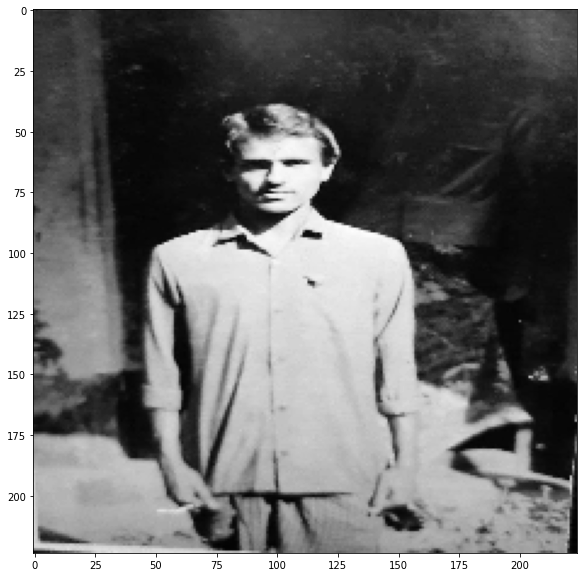

In [ ]:
img_path = '/content/dadstanding.jpeg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_input = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

img_rgb = img.copy()

img_rgb = (img_rgb / 255.).astype(np.float32)

img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
img_l = img_lab[:, :, 0]

input_img = cv2.resize(img_l, (224, 224))
input_img -= 50 
plt.figure(figsize=(10,10))
plt.imshow(input_img, cmap='gray')

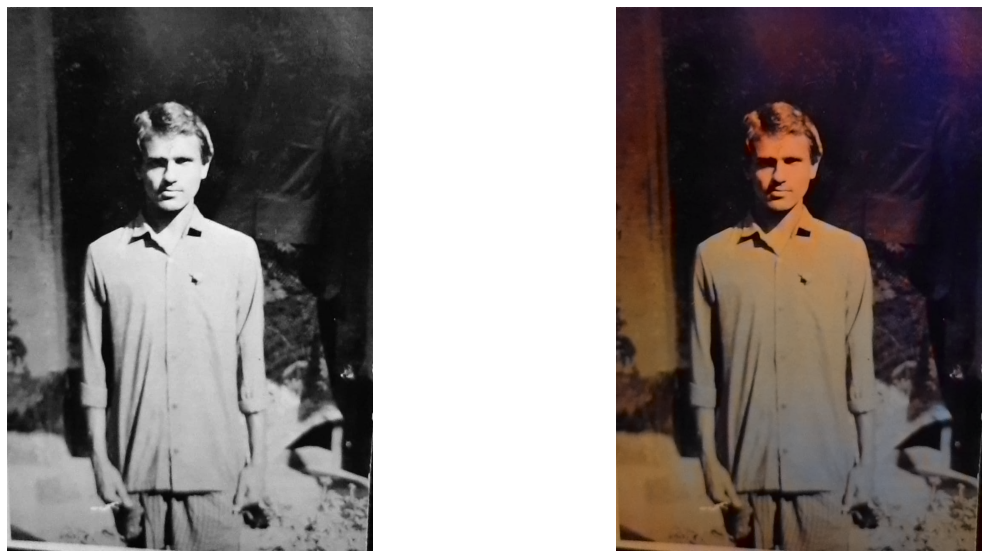

In [ ]:
net.setInput(cv2.dnn.blobFromImage(input_img))
pred = net.forward()[0,:,:,:].transpose((1, 2, 0))

pred_resize = cv2.resize(pred, (img.shape[1], img.shape[0]))

pred_lab = np.concatenate([img_l[:, :, np.newaxis], pred_resize], axis=2)

pred_rgb = cv2.cvtColor(pred_lab, cv2.COLOR_Lab2RGB)
pred_rgb = np.clip(pred_rgb, 0, 1) * 255
pred_rgb = pred_rgb.astype(np.uint8)

fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 2, 1).axis('off')
plt.imshow(img_l, cmap='gray')
fig.add_subplot(1, 2, 2).axis('off')
plt.imshow(pred_rgb)
filename, ext = os.path.splitext(img_path)

In [ ]:

input_filename = '%s_input%s' % (filename, ext)
output_filename = '%s_output%s' % (filename, ext)
pred_rgb_output = cv2.cvtColor(pred_rgb, cv2.COLOR_RGB2BGR)
plt.savefig(output_filename)
cv2.imwrite(output_filename, pred_rgb_output)

True

<Figure size 432x288 with 0 Axes>